<a href="https://colab.research.google.com/github/ttruong1000/MAT-494-Mathematical-Methods-for-Data-Science/blob/main/3_4_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3.4 - Logistic Regression**

### **3.4.0 - Python Libraries for Logistic Regression**

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit
from sklearn import linear_model
from sklearn import datasets

### **3.4.1 - Logistic Regression**

Logistic regression is a model that in its basic form uses a logistic function to model a binary dependent variable. It can be extended to several classes of events usch as the classification of images. In this section, we illustrate the use of gradient descent on the binary classifiation by logistic regression.

Given that the input data is of the form $\{(\alpha_i, b_i) \ | \ i = 1, 2, \ldots, n\}$, where $\alpha_i \in \mathbb{R}^d$ are the features and $b_i \in \{0, 1\}$ is the label. As before, we use a matrix representation: $A \in \mathbb{R}^{n \times d}$ has rows $\alpha_j^T$, $j = 1, 2, \ldots, n$ and $\mathbf{b} = (b_1, b_2, \ldots, b_n) \in \{0, 1\}^n$. We wish to find a function of the features that approximates the probability of the label 1. For this purpose, we model the logit function of the probability of label 1 as a linear function of the features.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


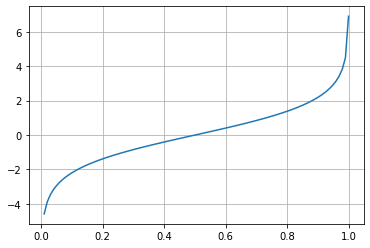

In [4]:
x = np.linspace(0, 0.999, num=100)
y = np.log(x/(1 - x))
plt.plot(x,y)
plt.grid()

For $\mathbb{x}$, $\alpha \in \mathbb{R}^d$. Let $p(\alpha; \mathbf{x})$ be the probability of the output to be 1. We define
\begin{equation*}
  \log\left(\frac{p(\alpha; \mathbf{x})}{1 - p(\alpha; \mathbf{x})}\right) = \alpha^T\mathbf{x}
\end{equation*}
Here, $\alpha^T\mathbf{x} = \sum x_i\alpha_i$ can be viewed as a regression problem which seeks the best parameters $\mathbf{x}$ with the given data $\alpha$. Rearranging this expression gives
\begin{equation*}
  p(\alpha; \mathbf{x}) = \sigma(\alpha^T\mathbf{x})
\end{equation*}
where the sigmoid function is
\begin{equation*}
  \sigma(t) = \frac{1}{1 + e^{-t}}
\end{equation*}
for all $t \in \mathbb{R}$. 

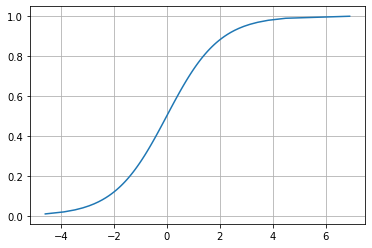

In [7]:
x_new = y
y_new = expit(x_new)
 
plt.plot(x_new,y_new)
plt.grid()

To maximize the likelihood of the data, we assume the labels are independent given the features, which is given by
\begin{equation*}
  \mathcal{L}(\mathbf{x}; A, \mathbf{b}) = \prod_{i = 1}^n p(\alpha_i; \mathbf{x})^{b_i}(1 - p(\alpha_i; \mathbf{x}))^{1 - b_i}
\end{equation*}
Taking the logarithm on both sides, multiplying each side by $-\frac{1}{n}$, and substituting the sigmoid function, we want to minimize the cross-entropy loss
\begin{equation*}
  \ell(\mathbf{x}; A, \mathbf{b}) = -\frac{1}{n}\sum_{i = 1}^n b_i\log(\sigma(\alpha_i; \mathbf{x})) - \frac{1}{n}\sum_{i = 1}^n (1 - b_i)\log(1 - \sigma(\alpha_i; \mathbf{x}))
\end{equation*}
That is, we solve for
\begin{equation*}
  \min_{\mathbf{x} \in \mathbb{R}^d} \ell(\mathbf{x}; A, \mathbf{b})
\end{equation*}
To use the gradient descent, we need to compute the gradient of $\ell$. We use the chain rule and first compute the derivative of $\sigma$, which is
\begin{equation*}
  \sigma'(t) = \frac{e^{-t}}{(1 + e^{-t})^2} = \frac{1}{1 + e^{-t}}\left(1 - \frac{1}{1 + e^{-t}}\right) = \sigma(t)(1 - \sigma(t))
\end{equation*}
It follows that $\sigma(t)$ satisfies the logistic differential equation. It arises in a variety of applications, including the modeling of population dynamics. Here, it will be a conveinent way to compute the gradient. Indeed, observe that, by the Chain Rule,
\begin{equation*}
  \nabla_{\mathbf{x}}\sigma(\alpha^T\mathbf{x}) = \sigma(\alpha^T\mathbf{x})(1 - \sigma(\alpha^T\mathbf{x}))\alpha
\end{equation*}
where the gradeint $\nabla_{\mathbf{x}}$ is with respect to $\mathbf{x}$. With the same approach on the cross-entropy loss, we have
\begin{align*}
  \nabla_{\mathbf{x}}\ell(\mathbf{x}; A, \mathbf{b}) &= -\frac{1}{n}\sum_{i = 1}^n \frac{b_i}{\sigma(\alpha_i^T\mathbf{x})}\nabla_{\mathbf{x}}\sigma(\alpha^T\mathbf{x}) + \frac{1}{n}\sum_{i = 1}^n \frac{1 - b_i}{1 - \sigma(\alpha_i^T\mathbf{x})}\nabla_{\mathbf{x}}\sigma(\alpha^T\mathbf{x}) \\
  &= -\frac{1}{n}\sum_{i = 1}^n\left(\frac{b_i}{\sigma(\alpha_i^T\mathbf{x})} - \frac{1 - b_i}{1 - \sigma(\alpha_i^T\mathbf{x})}\right)\sigma(\alpha_i^T\mathbf{x})(1 - \sigma(\alpha_i^T\mathbf{x}))\alpha_i \\
  &= -\frac{1}{n}\sum_{i = 1}^n(b_i - \sigma(\alpha_i^T\mathbf{x}))\alpha_i
\end{align*}
To compute the Hessian, we note that
\begin{equation*}
  \nabla_{\mathbf{x}}(\sigma(\alpha^T\mathbf{x})\alpha_j) = \sigma(\alpha^T\mathbf{x})(1 - \sigma(\alpha^T\mathbf{x}))\alpha\alpha_j
\end{equation*}
so that
\begin{equation*}
  \nabla_{\mathbf{x}}(\sigma(\alpha^T\mathbf{x})\alpha) = \sigma(\alpha^T\mathbf{x})(1 - \sigma(\alpha^T\mathbf{x}))\alpha\alpha^T
\end{equation*}
Thus,
\begin{equation*}
  \nabla_{\mathbf{x}}^2\ell(\mathbf{x}; A, \mathbf{b}) = \frac{1}{n}\sum_{i = 1}^n \sigma(\alpha_i^T\mathbf{x})(1 - \sigma(\alpha_i^T\mathbf{x}))\alpha_i\alpha_i^T
\end{equation*}
where $\nabla_{\mathbf{x}}^2$ is the Hessian with respect to $\mathbf{x}$. Each $\alpha_i\alpha_i^T$ is a symmetric matrix and PSD. As a result, the function $\ell(\mathbf{x}; A, \mathbf{b})$ is convex as a function of $\mathbf{x} \in \mathbb{R}^d$. We want to comment that convexity is one reason for working with the cross-entropy loss rather than the mean-squared error.

To update the iteration formula, for step size $\beta$, one step of gradient descent is
\begin{equation*}
  \mathbf{x}^{k + 1} = \mathbf{x}^k + \beta\left(\frac{1}{n}\sum_{i = 1}^n (b_i - \sigma(\alpha_i^T\mathbf{x}^k))\alpha_i\right)
\end{equation*}
In stochastic gradient descent, a variant of gradient descent, we pick a sample $I$ uniformly at random in $\{1, 2, \ldots, n\}$ and update the iteration by
\begin{equation*}
  \mathbf{x}^{k + 1} = \mathbf{x}^k + \beta(b_I - \sigma(\alpha_I^T\mathbf{x}^k))\alpha_I
\end{equation*}

### **3.4.2 - References**

1. MAT 494 Chapter 3 Notes
2. https://ajaytech.co/python-logistic-regression/